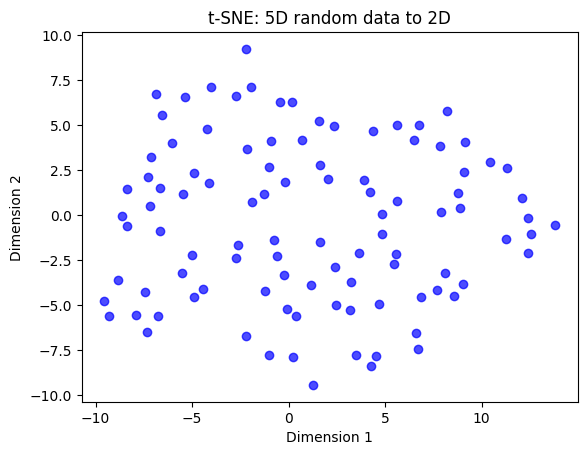

[3 4]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 產生隨機 5 維資料 (100 筆樣本)
X = np.random.rand(100, 5)

# 用 t-SNE 把 5 維降到 2 維
tsne = TSNE(n_components=2, random_state=42, perplexity=20, max_iter=500)
X_tsne = tsne.fit_transform(X)

# 畫圖
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='blue', alpha=0.7)
plt.title("t-SNE: 5D random data to 2D")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

a=np.array([3,4,3,5])
mask=np.array([True,True,False,False])
a=a[mask]
print(a)

In [6]:
import numpy as np
from collections import defaultdict

# 假設資料 shape = (n_samples, 4), columns = [value, z, y, x]
np.random.seed(0)
data = np.random.randint(0, 5, size=(10, 5))

print("原始資料:\n", data)

# 建立 dictionary
grouped = defaultdict(list)

for row in data:
    *vals,z,y,x=row
    print(vals[0])
    #grouped[(x, y, z)].append(val)

# 結果: dictionary 以 (x,y,z) 為 key, values 為 list
print("\nDictionary 結果 (收集 values):")
for k, v in grouped.items():
    print(k, "->", v)

原始資料:
 [[4 0 3 3 3]
 [1 3 2 4 0]
 [0 4 2 1 0]
 [1 1 0 1 4]
 [3 0 3 0 2]
 [3 0 1 3 3]
 [3 0 1 1 1]
 [0 2 4 3 3]
 [2 4 2 0 0]
 [4 0 4 1 4]]
4
1
0
1
3
3
3
0
2
4

Dictionary 結果 (收集 values):


In [ ]:
from importlib import reload ,import_module
import module.utilize as utilize
import module.multiVariant as multiVariant
import module.singleVariant as singleVariant
import numpy as np
from numba import njit,jit, float32
reload(utilize)
reload(multiVariant)
reload(singleVariant)
attribute_names=np.array(["phi_grav","particle_mass_density","xmom","ymom","zmom"])
incremental_number=100
all_ensamble_data=np.empty([0,incremental_number,64,64,64])

for name in attribute_names:
    data=utilize.readFiles(name,incremental_number)
    data=data.reshape(1,incremental_number,64,64,64)
    all_ensamble_data=np.append(all_ensamble_data,data,axis=0)


gt_data=[]
for i in range(attribute_names.shape[0]):
    data=np.array(all_ensamble_data[i,:,10,10,10],dtype=np.float32)
    data=data.flatten()
    gt_data.append(data)

gt_data=np.array(gt_data,dtype=np.float32)
gt_data=gt_data.T


covBlockSize=5
dataBlockSize=5
binsNumber=64
sizeZ=20
sizeY=20
sizeX=20
minMaxBlockSize=2
isMinMax=False
copulaModel=multiVariant.multiDistCopula3D(all_ensamble_data,dataBlockSize,covBlockSize,binsNumber,[sizeZ,sizeY,sizeX],minMaxBlockSize,isMinMax)
copulaModel.fit()
reconstData=copulaModel.sampleByPos(10,10,10,size=100)

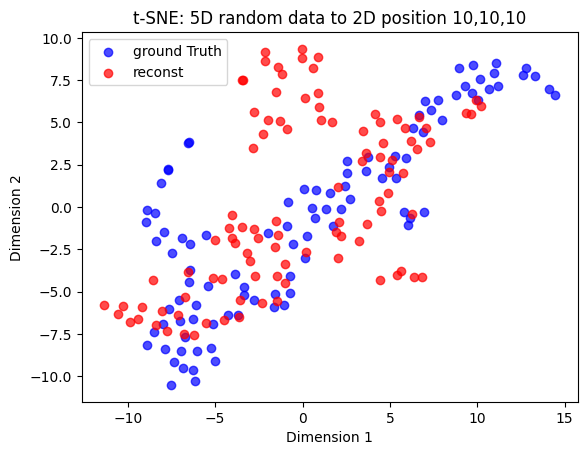

In [24]:
# 用 t-SNE 把 5 維降到 2 維
tsne = TSNE(n_components=2, random_state=42, perplexity=20, max_iter=500)
gt_tsne = tsne.fit_transform(gt_data)

tsne = TSNE(n_components=2, random_state=42, perplexity=20, max_iter=500)
reconst_tsne = tsne.fit_transform(reconstData)
# 畫圖
plt.scatter(gt_tsne[:, 0], gt_tsne[:, 1], c='blue', alpha=0.7,label="ground Truth")
plt.scatter(reconst_tsne[:, 0], reconst_tsne[:, 1], c='red', alpha=0.7,label="reconst")
plt.legend()
plt.title("t-SNE: 5D random data to 2D position 10,10,10")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [21]:
import numpy as np

# 假設 data.shape = (N, D)
data = np.random.rand(100000, 3)
bins = [10, 10, 10]
hist = np.zeros(bins, dtype=np.float64)  # 你可以自己指定 dtype

# 將樣本轉為索引
indices = []
for i in range(data.shape[1]):
    max=data.max()
    min=data.min()
    idx = np.searchsorted(np.linspace(min, max, bins[i] + 1), data[:, i], side='right') - 1
    idx = np.clip(idx, 0, bins[i]-1)
    indices.append(idx)

# 使用 np.add.at 統計
np.add.at(hist, tuple(indices), 1)

ddHist,_=np.histogramdd(data,bins=bins)

print(hist[5,6,9])
print(ddHist[5,6,9])
print(ddHist.dtype)
print(hist.dtype)
print(np.array_equal(hist,ddHist))
print(np.allclose(ddHist, hist, rtol=1e-5, atol=1e-8))
print(ddHist)

96.0
96.0
float64
float64
False
False
[[[109.  90.  94. 103. 105.  99.  99. 110.  90. 100.]
  [115.  98. 105. 116.  96. 109.  86. 119. 109. 108.]
  [100. 118. 101. 103.  89.  84.  88. 101.  97. 104.]
  [112. 114.  86.  99. 116. 106.  85. 107.  91.  98.]
  [ 91. 103.  90. 104. 119. 109.  89. 104. 105. 111.]
  [113. 102.  95. 109.  93. 100. 112.  78. 108.  95.]
  [100. 111. 106. 106.  81.  96. 101.  88. 101. 114.]
  [106.  90. 112.  91. 104. 101.  94.  92.  86. 105.]
  [126. 108.  97.  95. 114. 104. 106.  97.  94.  92.]
  [101. 116. 110.  95.  91.  86. 104. 106.  90.  82.]]

 [[ 82. 101.  99.  82.  99.  88.  98.  98. 119.  98.]
  [111. 105. 109. 101. 105. 125. 106. 100.  94.  92.]
  [ 97.  89. 122.  91. 103.  98. 107. 118. 111. 115.]
  [ 92.  92.  88. 109.  99. 119. 116.  94. 108. 102.]
  [107.  95. 109.  97.  98. 101.  96. 110. 114. 115.]
  [ 99.  92. 104. 105.  99.  94.  95. 100.  97.  92.]
  [101. 101.  89. 107.  99.  97. 108.  99. 103.  97.]
  [ 97. 106. 111. 115. 100. 109. 101. 108.

In [22]:
print(hist)
np.where(hist != ddHist)

[[[109.  90.  94. 103. 105.  99.  99. 110.  90. 100.]
  [115.  98. 105. 116.  96. 109.  86. 119. 109. 108.]
  [100. 118. 101. 103.  89.  84.  88. 101.  97. 104.]
  [112. 114.  86.  99. 116. 106.  85. 107.  91.  98.]
  [ 91. 103.  90. 104. 119. 109.  90. 104. 105. 111.]
  [113. 102.  95. 109.  93. 100. 111.  78. 108.  95.]
  [100. 111. 106. 106.  81.  96. 101.  88. 101. 114.]
  [106.  90. 112.  91. 104. 101.  94.  92.  86. 105.]
  [126. 108.  97.  95. 114. 104. 106.  97.  94.  92.]
  [101. 116. 110.  95.  91.  86. 104. 106.  90.  82.]]

 [[ 82. 101.  99.  82.  99.  88.  98.  98. 119.  98.]
  [111. 105. 109. 101. 105. 125. 106. 100.  94.  92.]
  [ 97.  89. 122.  91. 103.  98. 108. 118. 111. 115.]
  [ 92.  92.  88. 109.  99. 119. 115.  94. 108. 102.]
  [107.  95. 109.  97.  98. 101.  96. 110. 114. 115.]
  [ 99.  92. 104. 105.  99.  94.  95. 100.  97.  92.]
  [101. 101.  89. 107.  99.  97. 108.  99. 103.  97.]
  [ 97. 106. 111. 115. 100. 109. 101. 108. 101.  88.]
  [102.  96.  87. 102. 108

(array([0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 5, 5, 5, 6, 6, 6, 7, 7, 8, 8,
        9, 9]),
 array([4, 5, 2, 3, 3, 3, 5, 5, 5, 6, 7, 8, 6, 7, 8, 5, 6, 6, 4, 5, 4, 5,
        7, 8]),
 array([6, 6, 6, 6, 0, 1, 9, 7, 9, 7, 5, 5, 8, 5, 5, 1, 1, 8, 9, 9, 9, 9,
        7, 7]))

In [23]:
print(hist[0,4,6])
print(ddHist[0,4,6])

90.0
89.0


In [24]:
import numpy as np

def histogramdd_manual(data, bins, ranges=None, dtype=np.int64):
    data = np.asarray(data)
    N, D = data.shape
    hist = np.zeros(bins, dtype=dtype)

    # 建立每一維的 bin edges
    if ranges is None:
        ranges = [(np.min(data[:, d]), np.max(data[:, d])) for d in range(D)]
    edges = [np.linspace(r[0], r[1], bins[d] + 1) for d, r in enumerate(ranges)]

    # 建立各維索引
    indices = []
    for d in range(D):
        idx = np.searchsorted(edges[d], data[:, d], side='right') - 1
        # clip 到合法範圍（np.histogramdd 的行為）
        idx[idx < 0] = 0
        idx[idx >= bins[d]] = bins[d] - 1
        indices.append(idx)

    # 累計到對應 bin
    np.add.at(hist, tuple(indices), 1)
    return hist, edges

# --- 測試比對 ---
data = np.random.rand(10000, 3)
bins = [5, 5, 5]

h1, e1 = np.histogramdd(data, bins=bins)
h2, e2 = histogramdd_manual(data, bins=bins)

print("是否完全相等：", np.array_equal(h1, h2))
print("差異總和：", np.abs(h1 - h2).sum())

是否完全相等： True
差異總和： 0.0


In [25]:
import numpy as np

def histogramdd_manual(data, bins, dtype=np.int64):
    """
    自製 memory-efficient histogramdd
    - 支援 bins 為 int list 或 bin edges list
    - dtype 可控制
    - 結果行為與 np.histogramdd 一致
    """
    data = np.asarray(data)
    N, D = data.shape

    # 決定每一維的 edges
    if np.isscalar(bins):
        bins = [bins] * D
    edges = []
    bin_counts = []
    for b in bins:
        if np.isscalar(b):
            # 若是 int，建立等距邊界
            r = (np.min(data[:, len(edges)]), np.max(data[:, len(edges)]))
            e = np.linspace(r[0], r[1], b + 1)
        else:
            # 若是 array-like，直接使用
            e = np.asarray(b)
        edges.append(e)
        bin_counts.append(len(e) - 1)

    # 建立 histogram
    hist = np.zeros(bin_counts, dtype=dtype)

    # 逐維計算 index
    indices = []
    for d in range(D):
        idx = np.searchsorted(edges[d], data[:, d], side='right') - 1
        # clip 防止越界
        idx[idx < 0] = 0
        idx[idx >= bin_counts[d]] = bin_counts[d] - 1
        indices.append(idx)

    # 累積計數
    np.add.at(hist, tuple(indices), 1)

    return hist, edges

In [26]:
data = np.random.rand(10000, 3)

# 你可以傳整數
h1, e1 = histogramdd_manual(data, bins=[10, 20, 30], dtype=np.uint16)

# 或直接傳 bin edges
edges = [np.linspace(0, 1, 11), np.linspace(0, 1, 21), np.linspace(0, 1, 31)]
h2, e2 = histogramdd_manual(data, bins=edges, dtype=np.uint16)

# 比對 np.histogramdd 結果
ref, _ = np.histogramdd(data, bins=edges)
print("是否完全相等：", np.array_equal(ref, h2))

是否完全相等： True


In [3]:
import cupy as cp
print("CuPy version:", cp.__version__)
print("GPU count:", cp.cuda.runtime.getDeviceCount())
print("Device name:", cp.cuda.runtime.getDeviceProperties(0)["name"])

CuPy version: 13.6.0
GPU count: 1
Device name: b'NVIDIA GeForce RTX 3050 Ti Laptop GPU'
